# Acidification

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

### your name: Frank D'Agostino

In [1]:
# Plot carbonate species as DIC varies:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy import config
from mpl_toolkits.axes_grid1 import make_axes_locatable

# load variables from a pickle file:
with open('./acidification_variables.pickle', 'rb') as file:
        d = pickle.load(file)
        # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key, "; size=", d[key].shape)
            #print("; type=",type(d[key]))
        globals().update(d)

extracting pickled variable: name= CO2_obs_global_annual_mean ; size= (16,)
extracting pickled variable: name= CO2_obs_global_annual_mean_years ; size= (16,)
extracting pickled variable: name= CO2_rcp85_global_annual_mean ; size= (10,)
extracting pickled variable: name= CO2_rcp85_global_annual_mean_years ; size= (10,)
extracting pickled variable: name= K1 ; size= (1,)
extracting pickled variable: name= K2 ; size= (1,)
extracting pickled variable: name= Kb ; size= (1,)
extracting pickled variable: name= Kf ; size= (1,)
extracting pickled variable: name= Kh ; size= (1,)
extracting pickled variable: name= Ks ; size= (1,)
extracting pickled variable: name= Kw ; size= (1,)
extracting pickled variable: name= exact_alk ; size= (190,)
extracting pickled variable: name= exact_co2 ; size= (190,)
extracting pickled variable: name= exact_co3 ; size= (190,)
extracting pickled variable: name= exact_hco3 ; size= (190,)
extracting pickled variable: name= exact_pH ; size= (190,)
extracting pickled vari

### Explanation of input variables

K1,K2 etc are the equilibrium constants for the carbonate system. exact_alk, exact_co2, exact_co3 etc are the exact solution for the carbonate system as function of pH for a fixed Alk, units are concentration in mili mole per liter. exact_co2 is the dissolved co2, denoted $\rm{}H_2CO_3^*$ in the notes. exact_pco2 is $\rm{}CO_2(g)$ in ppm.

## 1) Plot a time series of pH from 1850 to 2100, combining observations and projection; 

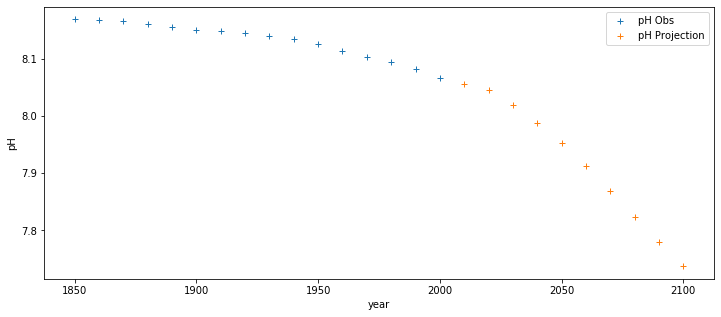

In [2]:
# plot:
plt.figure(figsize=(12,5))
plt.plot(pH_obs_global_annual_mean_years, pH_obs_global_annual_mean, "+")
plt.plot(pH_rcp85_global_annual_mean_years, pH_rcp85_global_annual_mean, "+")
plt.xlabel("year")
plt.ylabel("pH")
plt.legend(["pH Obs", "pH Projection"]);

## 2a) plot pH maps for 1850, 2000 (observed) and 2100 (rcp8.5):

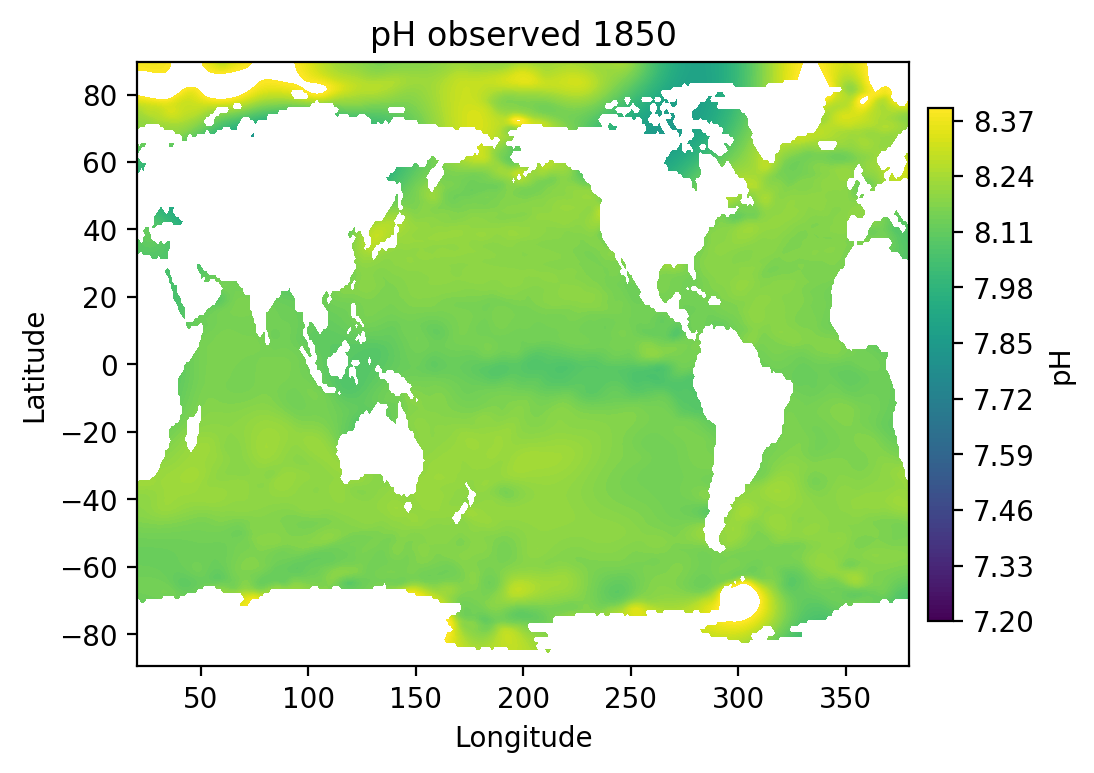

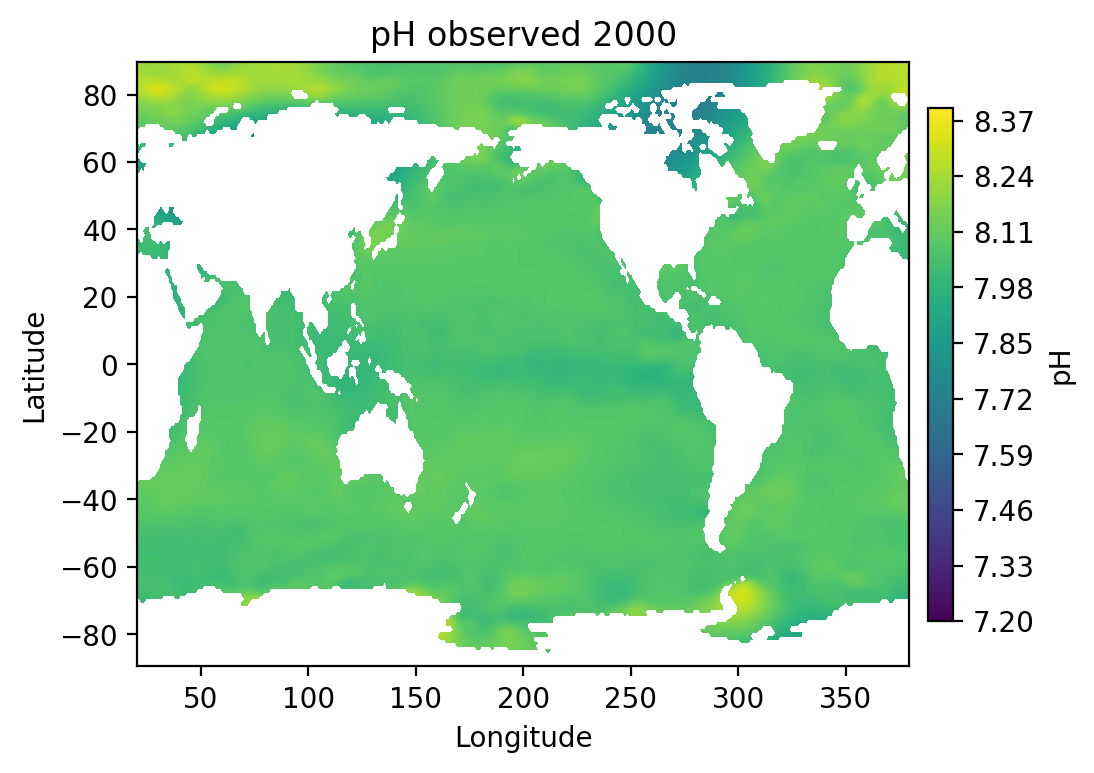

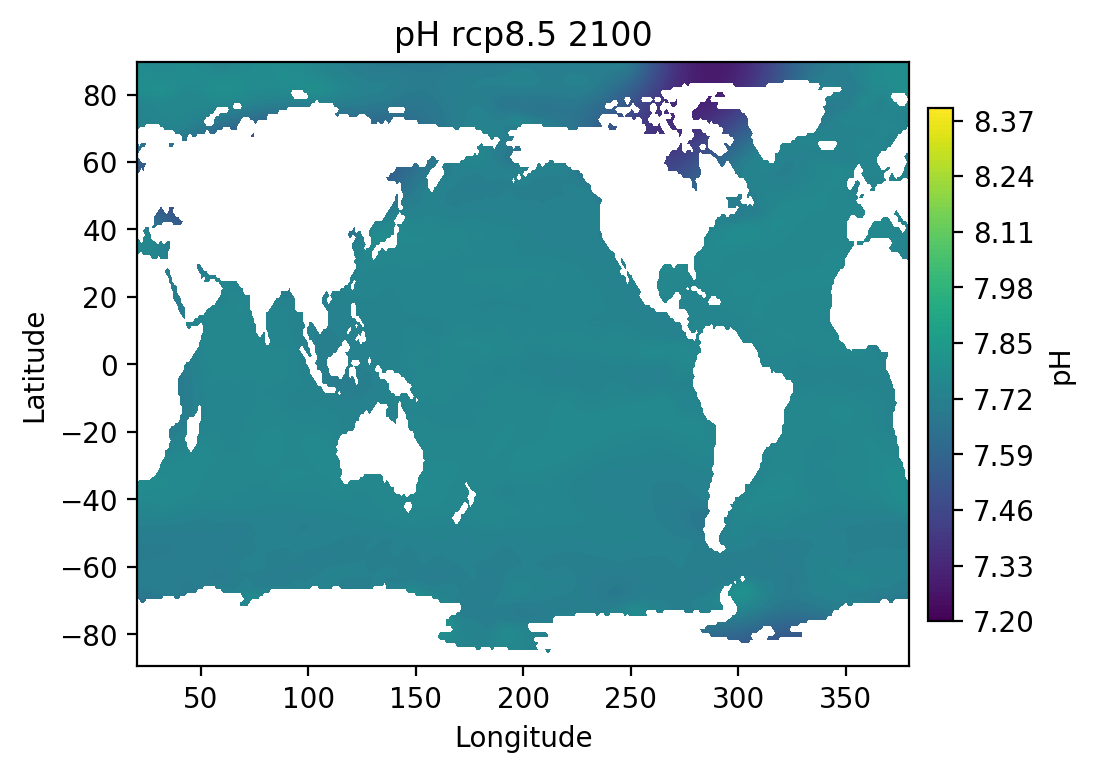

In [3]:
# plot contours for 1850:
plt.figure(dpi=200)
levels=np.arange(7.2,8.4,0.01)
c=plt.contourf(pH_map_longitude, pH_map_latitude, pH_obs_1850_map,levels)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('pH')
plt.title('pH observed 1850')
plt.show()

# plot contours for 2000:
plt.figure(dpi=200)
levels=np.arange(7.2,8.4,0.01)
c=plt.contourf(pH_map_longitude, pH_map_latitude, pH_obs_2000_map,levels)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('pH')
plt.title('pH observed 2000')
plt.show()

# plot contours:
plt.figure(dpi=200)
levels=np.arange(7.2,8.4,0.01)
c=plt.contourf(pH_map_longitude, pH_map_latitude, pH_rcp85_2100_map,levels)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('pH')
plt.title('pH rcp8.5 2100')
plt.show()

### 2b) Discuss: 
It seems that the change in pH from 1850 to 2000 was present, but fairly gradual and did not have as high of an amplitude. However, the projected change in pH from 2000 to 2100 is extremely significant, as the colors of the graphs change drastically. Spatially, it seems that the oceans near the poles suffered the great change in pH, while waters near the equator did not have as much of a change, for both the historical observations and projections. Temporally, there is a much more significant change than spatially due to the drastic increase in CO2 output from the Industrial Revolution, making it extremely difficult for organisms to find refuge since the pH seems to be occuring fairly evenly across the oceans, with minor differences according to location. As such, it will make it very hard for biology to acclimate to these more acidic waters in such a short time, as 100 years is not nearly enough time for species to adapt to a change in circumstance. Therefore, many of the biological life, especially by the poles, will be hit and suffer large drops in population.

### 2c) Calculate and contour the percentage change in [H+]:

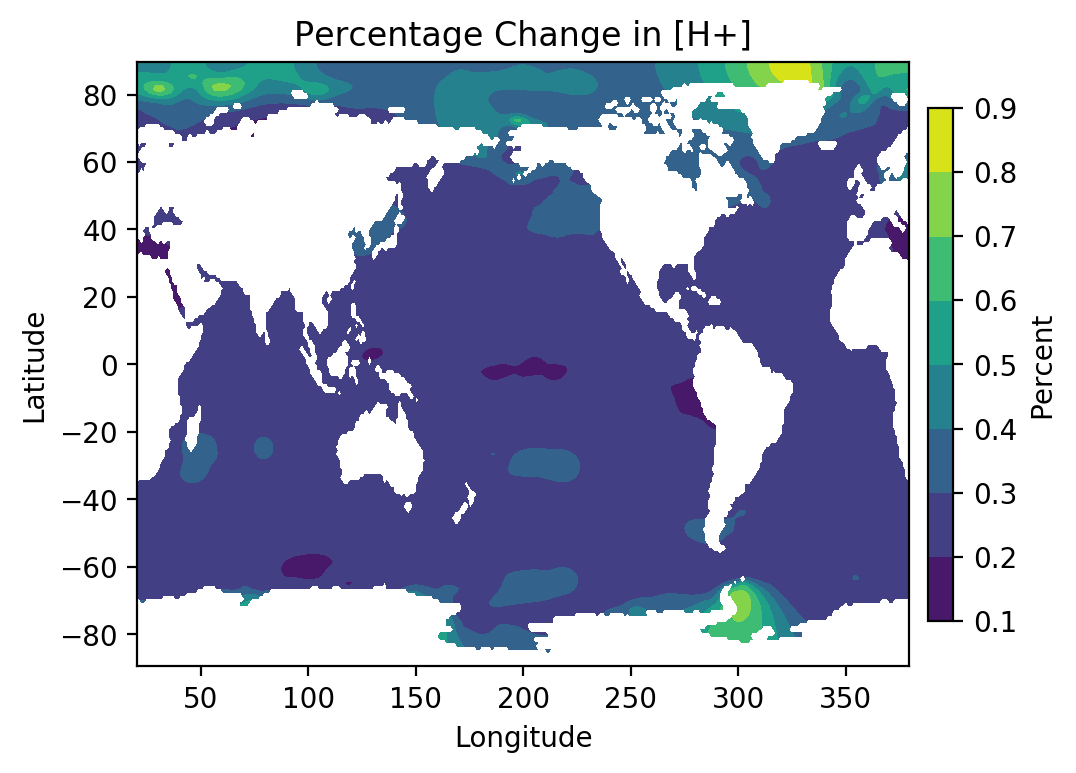

In [4]:
H_1850 = 10**(-pH_obs_1850_map) # pH is -Log10[H+]
H_2000 = 10**(-pH_obs_2000_map) # pH is -Log10[H+]
# Contour the percentage change 
plt.figure(dpi=200)
c=plt.contourf(pH_map_longitude, pH_map_latitude, (H_2000-H_1850)/H_1850)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('Percent')

plt.title('Percentage Change in [H+]')
plt.show()

## 3a) Plot exact solution for carbonate system variables (HCO$_3^-$, CO$_3^{2-}$, H$_2$CO$_3^*$) as DIC varies, with fixed Alk:



        pH,               TOT_CO2,                HCO3,                   CO3,                     CO2
9.704011198322322     1.0280000299103755     0.2160283147245694     0.811934521648064     3.7193537742106744e-05
9.136541300288284     1.3364000468123505     0.6621906287565363     0.6737882943009361     0.00042112375487779485
8.743656347534749     1.6448000808590109     1.1637663196368164     0.47920491391788494     0.0018288473043096547
8.351501500385458     1.9532001644844519     1.6682700472032024     0.27846267052825413     0.006467446752995502
7.755214067106535     2.26160057347091     2.138447756295887     0.09042985673225293     0.032722960442770115
6.947822560836077     2.570003311902234     2.3262228088891117     0.015327559179987137     0.228452943833135
6.591335159984318     2.878406908898755     2.347673038859006     0.006807253180468525     0.5239266168592805
6.3935128442369     3.1868102116514216     2.354030156436863     0.004328366204028616     0.8284516890105302
6.

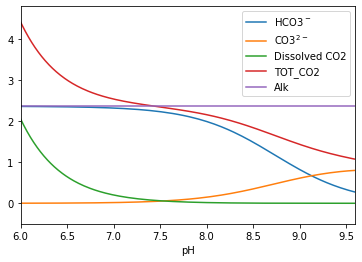

In [5]:
# print sample values in order to identify range of valid approximation:
print("\n\n        pH,               TOT_CO2,                HCO3,                   CO3,                     CO2")
totCO2_exact=exact_hco3+exact_co3+exact_co2
for i in range(0,len(exact_pH),15):
    print(exact_pH[i],"   ",totCO2_exact[i], "   ", exact_hco3[i], "   ", exact_co3[i], "   ", exact_co2[i])
    
# plot exact solution as dotted yellow line:
plt.plot(exact_pH,exact_hco3,label="HCO3$^-$")
plt.plot(exact_pH,exact_co3,label="CO3$^{2-}$")
plt.plot(exact_pH,exact_co2,label="Dissolved CO2")
plt.plot(exact_pH,totCO2_exact,label="TOT_CO2")
plt.plot(exact_pH,exact_alk,label="Alk")
plt.xlim(6,9.6)
plt.ylim(-0.5,4.8)
plt.xlabel("pH")
plt.legend();

## 3b) Plot pH as function of atmospheric CO2

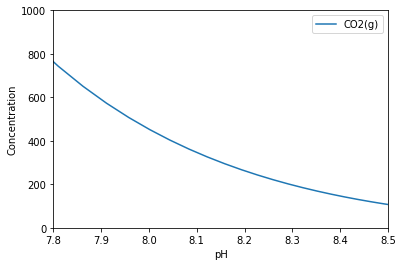

In [6]:
# plot exact solution as dotted yellow line:
plt.plot(exact_pH,exact_pco2,label="CO2(g)")
plt.xlabel("pH")
plt.ylabel("Concentration")
plt.xlim(7.8, 8.5)
plt.ylim(0, 1000)
plt.legend();

### 3c) discuss validity range:

The approximations should be valid for a pH of about 8 (7.8 to 8.5 approximately), because outside that range, the green line is above the orange line which cannot happen, as the concentration of dissolved CO2 is always smaller than the concentration of CO3^2-. Therefore, the range of CO2 in which the approximation is correct is approximately 100 to 700 ppm.

## 4) Calculate and plot the approximate solution to the carbonate system


considering DIC over the range of : 1850.4 2343.84 micro mole/liter


(7.5, 9.5)

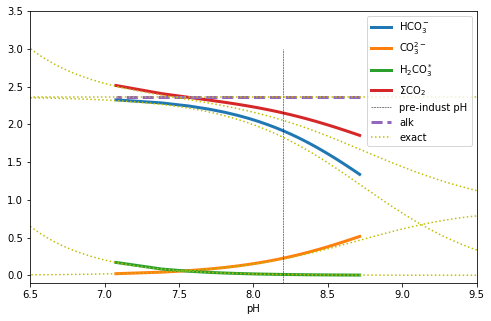

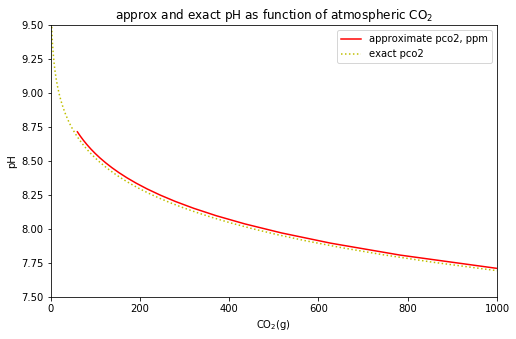

In [7]:
def solve_approximate_carbonate_system(dic,alk):
    """Calculate the approximate solution of carbonate system, solving for pH,pco2(=CO2(g)),
    co2 (=disolved CO2=H2CO3*), hco3 and co3 as function of total CO2 and alkalinity.  
    Inputs are in milimole per liter, outputs same, output pco2 is in ppt, needs to be multiplied 
    by 10^3 to get it in ppm."""
    C_T=dic*1.0
    hco3=2*C_T - alk
    co3=alk - C_T
    H=K2*((2*C_T - alk)/(alk - C_T))
    pH=-np.log10(H)
    co2=(K2/K1) * ((2*C_T - alk)**2 / (alk - C_T)) # this is $H_2CO_3^*$
    pco2=(K2 / (K1*Kh)) * ((2*C_T - alk)**2 / (alk - C_T)) # this is CO2(g)

    return pH,pco2,co2,hco3,co3


# reference values for inputs for approximate solution:
dic0=2000*1028e-6
alk0=2300*1028e-6
DIC_range=dic0*np.arange(0.9,1.15,0.01)
print("\nconsidering DIC over the range of :", DIC_range[0]*1000,DIC_range[-1]*1000,"micro mole/liter")
N=len(DIC_range)
# initialize array of output values:
approx_alk=np.zeros(N)
approx_pH=np.zeros(N)
approx_pco2=np.zeros(N)
approx_co2=np.zeros(N)
approx_hco3=np.zeros(N)
approx_co3=np.zeros(N)
i=-1
for dic in DIC_range:
    i=i+1
    pH,pco2,co2,hco3,co3 = solve_approximate_carbonate_system(alk=alk0, dic=dic)
    approx_alk[i]=alk0
    approx_pH[i]=pH
    approx_pco2[i]=pco2
    approx_co2[i]=co2 # this is H2CO3*
    approx_hco3[i]=hco3
    approx_co3[i]=co3
    #print(pH,pco2,fco2,co2,hco3,co3)

# plot calculated approximate solution as function of pH:
plt.figure(1,figsize=(8,5))
approx_totCO2=approx_hco3+approx_co3+approx_co2
plt.plot(approx_pH,approx_hco3,label="HCO$_3^-$",lw=3)
plt.plot(approx_pH,approx_co3,label="CO$_3^{2-}$",lw=3)
plt.plot(approx_pH,approx_co2,label="H$_2$CO$_3^*$",lw=3) # this is H2CO3*
plt.plot(approx_pH,approx_totCO2,label="$\Sigma$CO$_2$",lw=3)
plt.plot([8.2,8.2],[-0.1,3.0],color="k",linewidth=0.5,linestyle="--",label="pre-indust pH")
plt.plot(approx_pH,approx_alk,"--",label="alk",lw=3)
plt.xlabel("pH")
plt.legend()

# plot exact solution as dotted yellow line:
totCO2_exact=exact_hco3+exact_co3+exact_co2
plt.plot(exact_pH,exact_hco3,":y",label="exact")
plt.plot(exact_pH,exact_co3,":y")
plt.plot(exact_pH,exact_co2,":y") # this is H2CO3*
plt.plot(exact_pH,totCO2_exact,":y")
plt.plot(exact_pH,exact_alk,":y")
plt.xlim(6.5,9.5)
plt.ylim(-0.1,3.5)
plt.legend()

# plot pH vs co2(g):
plt.figure(2,figsize=(8,5))
#note units of approx_pco2, and convert to ppm for plot:
plt.plot(approx_pco2*10**3,approx_pH,"-r",label='approximate pco2, ppm')
plt.plot(exact_pco2,exact_pH,":y",label='exact pco2')
plt.ylabel('pH')
plt.xlabel('CO$_2$(g)')
plt.title("approx and exact pH as function of atmospheric CO$_2$")
plt.xlim(0,1000)

plt.legend()
plt.ylim(7.5,9.5)


## 5a) Manually estimating pH from CO$_2$ using approximate solution

use CO2 values for 1850, 2000, 2100, which can be found in the following printout:

In [8]:
print("year, pCO2, pH")
print("--------------")
for i in range(0,len(CO2_obs_global_annual_mean)):
    print(CO2_obs_global_annual_mean_years[i], int(CO2_obs_global_annual_mean[i]), pH_obs_global_annual_mean[i])

for i in range(0,len(CO2_rcp85_global_annual_mean)):
    print(CO2_rcp85_global_annual_mean_years[i],int(CO2_rcp85_global_annual_mean[i]), pH_rcp85_global_annual_mean[i])


year, pCO2, pH
--------------
1850.0 285 8.168398433448052
1860.0 286 8.166491998341142
1870.0 288 8.16482574620965
1880.0 290 8.160987756327783
1890.0 293 8.155511967995837
1900.0 296 8.150264954478493
1910.0 299 8.148115664309811
1920.0 303 8.145363491932851
1930.0 306 8.138707171533136
1940.0 309 8.134310741274389
1950.0 312 8.124535584365383
1960.0 316 8.113021567429284
1970.0 324 8.102527209735529
1980.0 338 8.093957951439345
1990.0 354 8.082003561372298
2000.0 369 8.0661018537348
2010.0 389 8.055394084043956
2020.0 415 8.044686314353106
2030.0 448 8.019057101228396
2040.0 489 7.9876314323668645
2050.0 540 7.95230874971675
2060.0 603 7.912461319151739
2070.0 677 7.86797945835103
2080.0 758 7.822683679878181
2090.0 844 7.779642664549822
2100.0 935 7.7368883577977945


In [9]:
# now calculate CO2:
alk=2.2

year=1850.0 # 285 ppm
dic=2.0026
pH,pco2,co2,hco3,co3 = solve_approximate_carbonate_system(dic,alk)
print("year=",year,"alk=",alk,"dic=",dic,", pco2=", pco2*1.e3," ppm, pH=",pH)

year=2000.0 # 369 ppm
dic=2.036
pH,pco2,co2,hco3,co3 = solve_approximate_carbonate_system(dic,alk)
print("year=",year,"alk=",alk,"dic=",dic,", pco2=", pco2*1.e3," ppm, pH=",pH)

year=2100.0 # 935 ppm
dic=2.12273
pH,pco2,co2,hco3,co3 = solve_approximate_carbonate_system(dic,alk)
print("year=",year,"alk=",alk,"dic=",dic,", pco2=", pco2*1.e3," ppm, pH=",pH)

print("\nThe pH values at these years are 8.1678, 8.0715, and 7.7062. Above, the pH values were")
print("8.1684, 8.0661, and 7.7369. Therefore, the pH values are very similar and fairly accurate for the given DIC.")

year= 1850.0 alk= 2.2 dic= 2.0026 , pco2= [285.17528059]  ppm, pH= [8.16782269]
year= 2000.0 alk= 2.2 dic= 2.036 , pco2= [369.12734325]  ppm, pH= [8.07153887]
year= 2100.0 alk= 2.2 dic= 2.12273 , pco2= [935.36140506]  ppm, pH= [7.70622079]

The pH values at these years are 8.1678, 8.0715, and 7.7062. Above, the pH values were
8.1684, 8.0661, and 7.7369. Therefore, the pH values are very similar and fairly accurate for the given DIC.


# 5b) Use the approximate carbonate system to solve for pH from $Alk_C$ and pCO$_2$

Start with the approximate carbonate equations,
\begin{align}
  K_H&= \rm \frac{[H_2CO_3^*]}{[CO_2(g)]}, \nonumber \\
  K_{1}&= \rm \frac{[HCO_3^-][H^+]}{[H_2CO_3^*]}, \nonumber \\
  K_{2}&= \rm \frac{[CO_3^{2-}][H^+]}{[HCO_3^-]}, \nonumber \\
  Alk_C&= \rm [HCO_3^-]+2[CO_3^{2-}], \nonumber \\
  C_T&= \rm [HCO_3^-]+[CO_3^{2-}].
  \label{eq:prognostic-carbonate-variables}
\end{align}
In this case we are given $\rm CO_2(g)$ and $Alk_C$. starting to solve we have from the first equation,
$$ \rm {[H_2CO_3^*]}=K_H \cdot [CO_2(g)] $$
and then from the second,
  $$ \rm {[HCO_3^-]}=\frac{K_1 K_H [CO_2(g)]}{[H^+]}$$
we can now write the third equation as
$$  K_{2}= \rm \frac{[CO_3^{2-}][H^+]}{K_{1}{K_H}[CO_2(g)]/[H^+]} $$
so that,
$$  \rm [CO_3^{2-}]=\frac{K_{2} K_{1}{K_H}[CO_2(g)]}{[H^+]^2} $$
The (specified) alkalinity can now be written as
$$Alk_C = \frac{K_1 K_H [CO_2(g)]}{[H^+]} + 2\cdot \frac{K_{2} K_{1}{K_H}[CO_2(g)]}{[H^+]^2}$$
which we can get a quadratic equation for this concentration,
$$Alk_C[H^+]^2  - K_1 K_H [CO_2(g)] {[H^+]}- 2K_2 K_1 K_H [CO_2(g)]=0$$
Because the CO$_2$ and the alkalinity are known, all coefficients are known and we can solve for $[H^+]$ and thus for the pH.

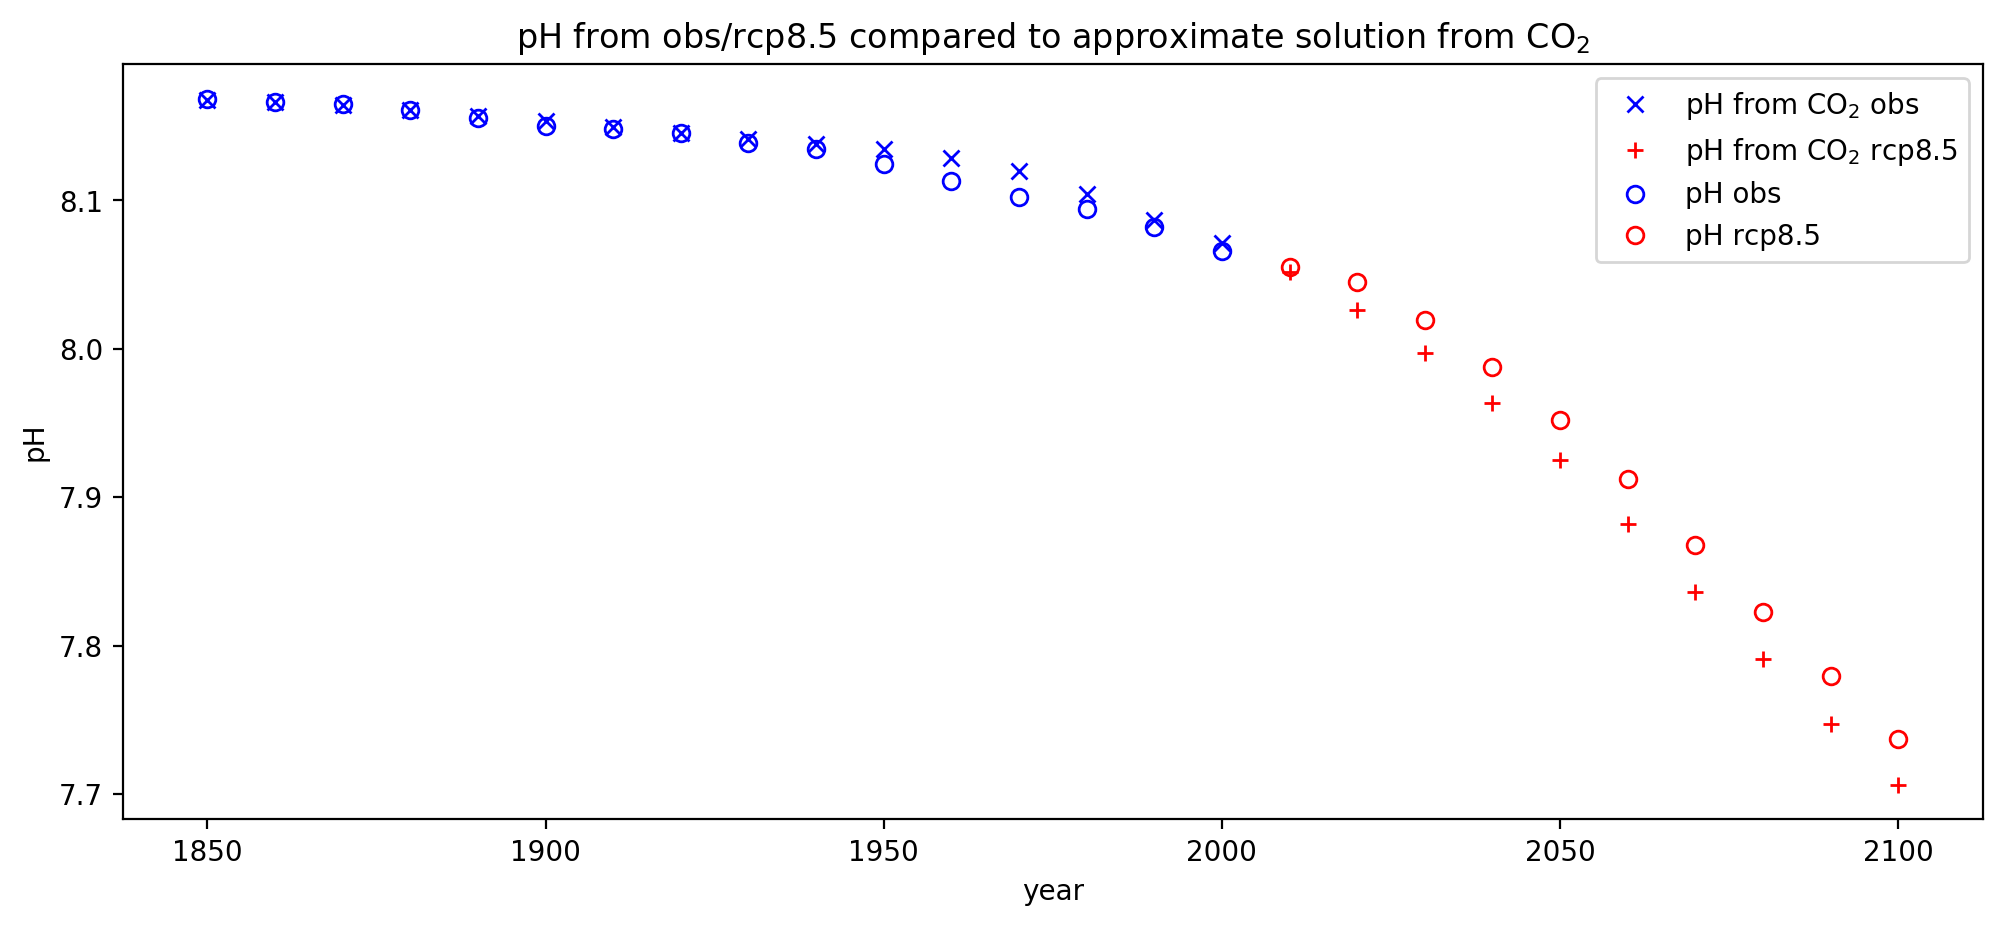

In [14]:
def solve_approximate_pH_from_Alk_and_CO2g(alk,pCO2):
    """
    Calculate the approximate solution of the carbonate system, solving for the pH
    as function of pco2(=CO2(g)) and alkalinity.  
    Input Alk is in milimole per liter, input pCO2 is in ppt (=ppm/1000).
    """
    # The quadratic equation for pH is ax^2+bx+c=0, where x=[H^+]: 
    a=alk
    b=-K1*Kh*pCO2
    c=-2*K2*K1*Kh*pCO2
    H1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    # H2=(-b-np.sqrt(b**2-4*a*c))/(2*a) # this is the non-physical solution
    pH=-np.log10(H1)
    co2=Kh*pCO2 # this is H2CO3*
    hco3=(K1*Kh*pCO2)/H1
    co3=(K2*K1*Kh*pCO2)/H1**2
    dic=hco3 + co3

    return pH,co2,hco3,co3,dic


# calculate expected pH from observed and RCP8.5 pCO2:
# ----------------------------------------------------
pH_from_CO2_obs_global_annual_mean=CO2_obs_global_annual_mean*0.0
for i in range(0,len(pH_from_CO2_obs_global_annual_mean)):
    pH,co2,hco3,co3,dic = solve_approximate_pH_from_Alk_and_CO2g(alk,CO2_obs_global_annual_mean[i]/1.0e3)
    pH_from_CO2_obs_global_annual_mean[i]=pH

pH_from_CO2_rcp85_global_annual_mean=CO2_rcp85_global_annual_mean*0.0
for i in range(0,len(pH_from_CO2_rcp85_global_annual_mean)):
    pH,co2,hco3,co3,dic = solve_approximate_pH_from_Alk_and_CO2g(alk,CO2_rcp85_global_annual_mean[i]/1.0e3)
    pH_from_CO2_rcp85_global_annual_mean[i]=pH

# plot:
# -----
plt.figure(figsize=(12,5),dpi=200)
plt.plot(pH_obs_global_annual_mean_years,pH_from_CO2_obs_global_annual_mean,"x",color="blue",label="pH from CO$_2$ obs")
plt.plot(pH_rcp85_global_annual_mean_years,pH_from_CO2_rcp85_global_annual_mean,"+",color="red",label="pH from CO$_2$ rcp8.5")
plt.plot(pH_obs_global_annual_mean_years,pH_obs_global_annual_mean,"o",color="blue",markerfacecolor='none',label="pH obs")
plt.plot(pH_rcp85_global_annual_mean_years,pH_rcp85_global_annual_mean,"o",color="red",markerfacecolor='none',label="pH rcp8.5")
plt.xlabel("year")
plt.ylabel("pH")
plt.title("pH from obs/rcp8.5 compared to approximate solution from CO$_2$")
plt.legend();